<a href="https://colab.research.google.com/github/semesarker/A-Dilated-Attention-U-Net-Based-Approach-on-Speech-Emotion-Recognition/blob/main/Dilated_Attention_Unet_model_on_RAVDESS_using_feature_concatenation(mfcc%26mel_spectrogram).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/rav.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/rav.zip
   creating: rav/
   creating: rav/Actor_01/
  inflating: rav/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-02-01.wav  
  infl

In [ ]:
# Keras
#import tensorflow as tf
import IPython
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


# from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
Ravdess = "/content/rav"
ravdess_directory_list = os.listdir(Ravdess)
ravdess_directory_list

['Actor_18',
 'Actor_24',
 'Actor_09',
 'Actor_22',
 'Actor_10',
 'Actor_15',
 'Actor_14',
 'Actor_05',
 'Actor_06',
 'Actor_16',
 'Actor_17',
 'Actor_07',
 'Actor_02',
 'Actor_08',
 'Actor_12',
 'Actor_19',
 'Actor_13',
 'Actor_11',
 'Actor_23',
 'Actor_21',
 'Actor_03',
 'Actor_20',
 'Actor_04',
 'Actor_01']

In [ ]:
# Ravdess preprocess
ravdess_directory_list = os.listdir(Ravdess)
file_path = []
file_emotion = []
for directory in ravdess_directory_list:
    # 24 different actors in Ravdess directory needed to be extracted as files for each actor
    actor = os.listdir(Ravdess + '/' + directory)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + directory + '/' + file)

In [ ]:
file_path

['/content/rav/Actor_18/03-01-03-02-02-02-18.wav',
 '/content/rav/Actor_18/03-01-03-02-02-01-18.wav',
 '/content/rav/Actor_18/03-01-08-01-01-01-18.wav',
 '/content/rav/Actor_18/03-01-06-02-01-02-18.wav',
 '/content/rav/Actor_18/03-01-06-01-01-02-18.wav',
 '/content/rav/Actor_18/03-01-02-02-01-02-18.wav',
 '/content/rav/Actor_18/03-01-06-01-02-01-18.wav',
 '/content/rav/Actor_18/03-01-01-01-02-02-18.wav',
 '/content/rav/Actor_18/03-01-07-02-01-02-18.wav',
 '/content/rav/Actor_18/03-01-05-01-02-02-18.wav',
 '/content/rav/Actor_18/03-01-04-02-02-01-18.wav',
 '/content/rav/Actor_18/03-01-06-01-01-01-18.wav',
 '/content/rav/Actor_18/03-01-08-01-01-02-18.wav',
 '/content/rav/Actor_18/03-01-01-01-01-02-18.wav',
 '/content/rav/Actor_18/03-01-08-02-02-02-18.wav',
 '/content/rav/Actor_18/03-01-04-01-01-02-18.wav',
 '/content/rav/Actor_18/03-01-02-02-01-01-18.wav',
 '/content/rav/Actor_18/03-01-08-01-02-01-18.wav',
 '/content/rav/Actor_18/03-01-03-02-01-01-18.wav',
 '/content/rav/Actor_18/03-01-0

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,happy,/content/rav/Actor_18/03-01-03-02-02-02-18.wav
1,happy,/content/rav/Actor_18/03-01-03-02-02-01-18.wav
2,surprise,/content/rav/Actor_18/03-01-08-01-01-01-18.wav
3,fear,/content/rav/Actor_18/03-01-06-02-01-02-18.wav
4,fear,/content/rav/Actor_18/03-01-06-01-01-02-18.wav


In [ ]:
Ravdess_df.shape

(1440, 2)

In [ ]:
Ravdess_df.Emotions.value_counts()

happy       192
surprise    192
fear        192
calm        192
disgust     192
angry       192
sad         192
neutral      96
Name: Emotions, dtype: int64

In [ ]:
ha_mel=list()
for i in range(90):
    emotion='happy'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    ha_mel.append(mel)

In [ ]:
su_mel=list()
for i in range(90):
    emotion='surprise'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    su_mel.append(mel)

In [ ]:
fe_mel=list()
for i in range(90):
    emotion='fear'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    fe_mel.append(mel)

In [ ]:
ca_mel=list()
for i in range(90):
    emotion='calm'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    ca_mel.append(mel)

In [ ]:
di_mel=list()
for i in range(90):
    emotion='disgust'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    di_mel.append(mel)

In [ ]:
an_mel=list()
for i in range(90):
    emotion='angry'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    an_mel.append(mel)

In [ ]:
sa_mel=list()
for i in range(90):
    emotion='sad'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    sa_mel.append(mel)

In [ ]:
nu_mel=list()
for i in range(90):
    emotion='neutral'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    nu_mel.append(mel)

Text(0.5, 1.0, 'Mean Mel-Spectrogram Variation on RAVDESS')

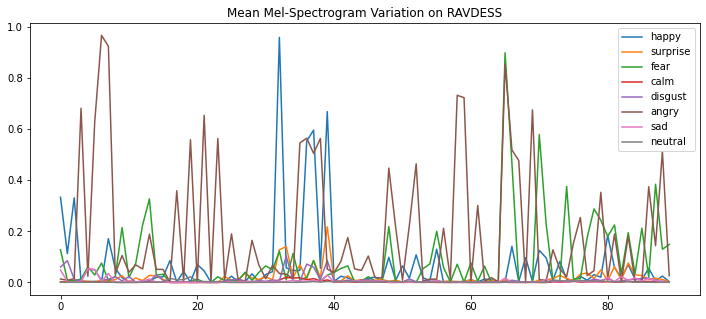

In [ ]:
mel_happy= ha_mel
mel_surprise= su_mel
mel_fear = fe_mel
mel_calm= ca_mel
mel_disgust= di_mel
mel_angry = an_mel
mel_sad= sa_mel
mel_neutral= nu_mel

plt.figure(figsize=(12,5))
plt.plot(mel_happy)
plt.plot(mel_surprise)
plt.plot(mel_fear)
plt.plot(mel_calm)
plt.plot(mel_disgust)
plt.plot(mel_angry)
plt.plot(mel_sad)
plt.plot(mel_neutral)

plt.legend(['happy','surprise','fear','calm','disgust','angry','sad','neutral'])
plt.title('Mean Mel-Spectrogram Variation on RAVDESS')

In [ ]:
ha_mf=list()
for i in range(90):
    emotion='happy'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    ha_mf.append(mf)

In [ ]:
su_mf=list()
for i in range(90):
    emotion='surprise'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    su_mf.append(mf)

In [ ]:
fe_mf=list()
for i in range(90):
    emotion='fear'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    fe_mf.append(mf)

In [ ]:
ca_mf=list()
for i in range(90):
    emotion='calm'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    ca_mf.append(mf)

In [ ]:
di_mf=list()
for i in range(90):
    emotion='disgust'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    di_mf.append(mf)

In [ ]:
an_mf=list()
for i in range(90):
    emotion='angry'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    an_mf.append(mf)

In [ ]:
sa_mf=list()
for i in range(90):
    emotion='sad'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    sa_mf.append(mf)

In [ ]:
nu_mf=list()
for i in range(90):
    emotion='neutral'
    path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    nu_mf.append(mf)

Text(0.5, 1.0, 'Mean MFCC Variation on RAVDESS')

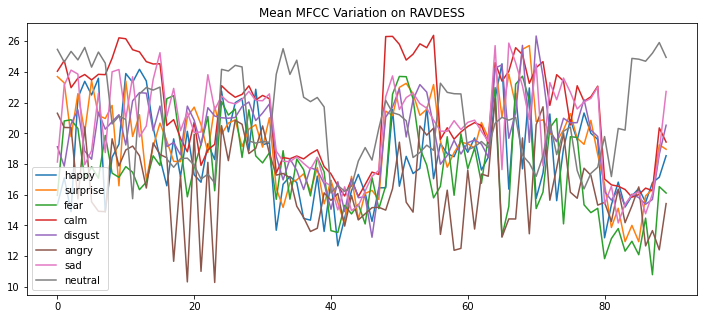

In [ ]:
mfcc_happy= ha_mf
mfcc_surprise= su_mf
mfcc_fear = fe_mf
mfcc_calm= ca_mf
mfcc_disgust= di_mf
mfcc_angry = an_mf
mfcc_sad= sa_mf
mfcc_neutral= nu_mf

plt.figure(figsize=(12,5))
plt.plot(mfcc_happy)
plt.plot(mfcc_surprise)
plt.plot(mfcc_fear)
plt.plot(mfcc_calm)
plt.plot(mfcc_disgust)
plt.plot(mfcc_angry)
plt.plot(mfcc_sad)
plt.plot(mfcc_neutral)

plt.legend(['happy','surprise','fear','calm','disgust','angry','sad','neutral'])
plt.title('Mean MFCC Variation on RAVDESS')

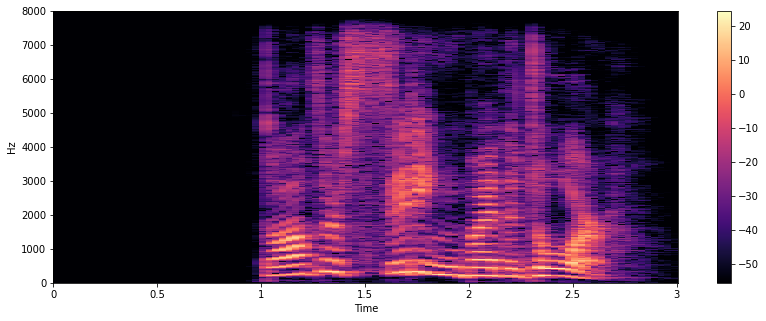

In [ ]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[10]
data, sr = librosa.load(path,sr=16000, duration=3)
st_data = np.abs(librosa.stft(data,n_fft=2048,hop_length=512))
st_db = librosa.amplitude_to_db(st_data)
plt.figure(figsize=(14, 5))
librosa.display.specshow(st_db, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
def create_mel_spectrogram(data, sr, e):
    mel_signal = librosa.feature.melspectrogram(y=data, sr=sr,n_fft=2048,hop_length=512, n_mels=30)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(12, 3))
    plt.title('Mel-Spectrogram for {}'.format(e), size=15)
    librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()

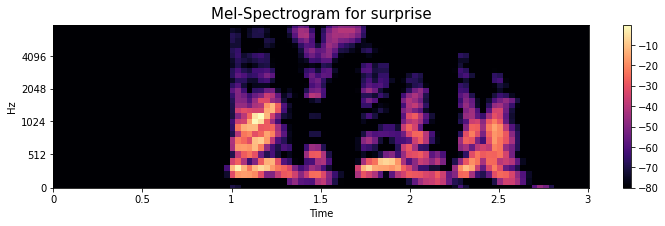

In [ ]:
emotion='surprise'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[150]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=np.abs(librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30))
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

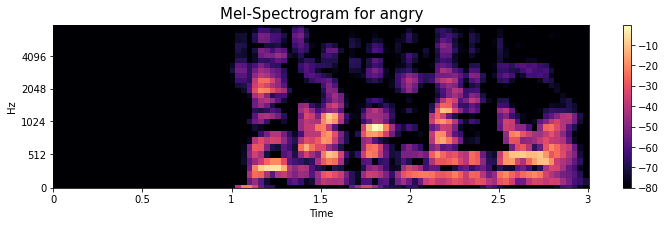

In [ ]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[50]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=np.abs(librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30))
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

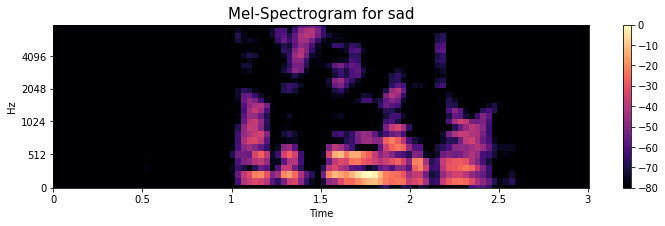

In [ ]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[6]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=np.abs(librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30))
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

In [ ]:
def create_mfcc(data,sr,e):
    mfcc = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)
    plt.figure(figsize=(12,3))
    plt.title('Mel-frequency cepstral coefficient for {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time',sr=sr)
    plt.ylabel('MFCC')
    plt.colorbar(format='%+02.0f dB')

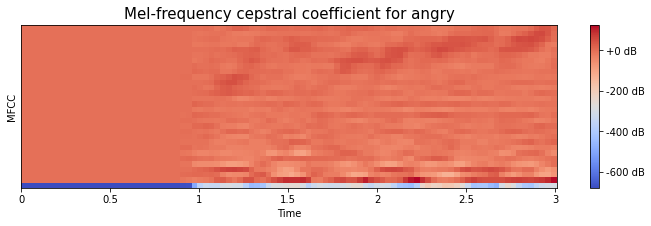

In [ ]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[150]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
sampling_rate=16000
audio_duration=3
n_mfcc = 30
n_melspec = 30
n_fft=512
def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,94,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate

                               ,duration=3

                              )

        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,48000)




          # which feature?
          # if mfcc == 1:
          #       # MFCC extraction
          #   MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
          #   MFCC = np.expand_dims(MFCC, axis=-1)
          #   X[cnt,] = MFCC
          #   print('mfcc',MFCC.shape)

        if mfcc == 1 and mel== 0:
                  # MFCC extraction
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              MFCC = np.expand_dims(MFCC, axis=-1)
              X[cnt,] = MFCC
              print('mfcc',MFCC.shape)

        elif mfcc==0 and mel==1 :
                  # Log-melspectogram

              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_fft=2048,hop_length=512)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              logspec = np.expand_dims(logspec, axis=-1)
              X[cnt,] = logspec

              print('mel',logspec.shape)

        elif mfcc==1 and mel== 1:
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate,n_fft=2048,hop_length=512, n_mels = n_melspec)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              mfcc_logspec= np.concatenate((MFCC,logspec),axis=0)
              #mel_logspec= np.vstack([MFCC,logspec])
              #print(mfcc_logspec.shape)
              mfcc_logspec = np.expand_dims(mfcc_logspec, axis=-1)
              X[cnt,] = mfcc_logspec
              print('mfcc_logspec',mfcc_logspec.shape)

        cnt += 1

    return X

In [ ]:
mel_mfcc = prepare_data(Ravdess_df,n=60,mfcc=1,mel=1)

  0%|          | 2/1440 [00:00<03:23,  7.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 4/1440 [00:00<03:35,  6.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 6/1440 [00:00<03:25,  6.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 8/1440 [00:01<03:17,  7.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 10/1440 [00:01<03:15,  7.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 12/1440 [00:01<03:10,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 14/1440 [00:01<03:08,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 16/1440 [00:02<03:07,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 18/1440 [00:02<03:04,  7.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 20/1440 [00:02<03:04,  7.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 22/1440 [00:02<03:07,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 24/1440 [00:03<03:04,  7.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 26/1440 [00:03<03:02,  7.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 28/1440 [00:03<03:03,  7.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 30/1440 [00:04<03:00,  7.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 32/1440 [00:04<03:00,  7.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 34/1440 [00:04<02:59,  7.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▎         | 36/1440 [00:04<03:05,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 38/1440 [00:05<03:03,  7.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 40/1440 [00:05<03:05,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 42/1440 [00:05<03:03,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 44/1440 [00:05<03:02,  7.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 46/1440 [00:06<03:00,  7.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 48/1440 [00:06<03:01,  7.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 50/1440 [00:06<03:00,  7.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 52/1440 [00:06<03:02,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 54/1440 [00:07<03:03,  7.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 56/1440 [00:07<03:01,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 58/1440 [00:07<03:04,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 60/1440 [00:07<03:01,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 62/1440 [00:08<03:02,  7.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 64/1440 [00:08<02:59,  7.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 66/1440 [00:08<03:00,  7.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 68/1440 [00:08<02:58,  7.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 70/1440 [00:09<02:57,  7.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 72/1440 [00:09<02:55,  7.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 74/1440 [00:09<02:57,  7.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 76/1440 [00:10<02:59,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 78/1440 [00:10<03:00,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 80/1440 [00:10<02:58,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 82/1440 [00:10<02:58,  7.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 84/1440 [00:11<02:57,  7.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 86/1440 [00:11<02:59,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 88/1440 [00:11<02:56,  7.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 90/1440 [00:11<02:57,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 92/1440 [00:12<02:56,  7.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 94/1440 [00:12<02:54,  7.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 96/1440 [00:12<02:52,  7.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 98/1440 [00:12<02:56,  7.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 100/1440 [00:13<02:55,  7.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 102/1440 [00:13<02:52,  7.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 104/1440 [00:13<02:51,  7.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 106/1440 [00:13<02:54,  7.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 108/1440 [00:14<02:54,  7.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 110/1440 [00:14<02:51,  7.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 112/1440 [00:14<02:50,  7.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 114/1440 [00:15<02:54,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 116/1440 [00:15<02:54,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 118/1440 [00:15<02:53,  7.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 120/1440 [00:15<02:51,  7.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 122/1440 [00:16<02:55,  7.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 124/1440 [00:16<02:54,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 126/1440 [00:16<02:52,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 128/1440 [00:16<02:56,  7.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 130/1440 [00:17<02:55,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 132/1440 [00:17<02:53,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 134/1440 [00:17<02:57,  7.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 136/1440 [00:17<03:08,  6.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 138/1440 [00:18<03:05,  7.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 140/1440 [00:18<02:58,  7.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 142/1440 [00:18<02:55,  7.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 144/1440 [00:19<02:56,  7.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 146/1440 [00:19<02:57,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 148/1440 [00:19<02:56,  7.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 150/1440 [00:19<02:52,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 152/1440 [00:20<02:52,  7.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 154/1440 [00:20<02:49,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 156/1440 [00:20<02:48,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 158/1440 [00:20<02:45,  7.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 160/1440 [00:21<02:49,  7.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 162/1440 [00:21<02:48,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 164/1440 [00:21<02:43,  7.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 166/1440 [00:21<02:41,  7.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 168/1440 [00:22<02:45,  7.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 170/1440 [00:22<02:46,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 172/1440 [00:22<02:45,  7.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 174/1440 [00:23<02:44,  7.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 176/1440 [00:23<02:47,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 178/1440 [00:23<02:46,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▎        | 180/1440 [00:23<02:45,  7.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 182/1440 [00:24<02:48,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 184/1440 [00:24<02:47,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 186/1440 [00:24<02:45,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 188/1440 [00:24<02:45,  7.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 190/1440 [00:25<03:05,  6.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 192/1440 [00:25<03:29,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 194/1440 [00:25<03:36,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 196/1440 [00:26<03:37,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 198/1440 [00:26<03:20,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 200/1440 [00:26<02:58,  6.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 201/1440 [00:27<03:11,  6.46it/s]

mfcc_logspec (60, 94, 1)


 14%|█▍        | 203/1440 [00:27<03:25,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 204/1440 [00:27<03:42,  5.56it/s]

mfcc_logspec (60, 94, 1)


 14%|█▍        | 205/1440 [00:27<03:55,  5.25it/s]

mfcc_logspec (60, 94, 1)


 14%|█▍        | 206/1440 [00:28<05:07,  4.02it/s]

mfcc_logspec (60, 94, 1)


 14%|█▍        | 208/1440 [00:28<04:38,  4.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 210/1440 [00:28<03:39,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 212/1440 [00:29<03:12,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 214/1440 [00:29<02:59,  6.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 216/1440 [00:29<03:03,  6.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 218/1440 [00:30<03:16,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 220/1440 [00:30<03:03,  6.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 222/1440 [00:30<03:09,  6.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 224/1440 [00:31<03:17,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 225/1440 [00:31<03:17,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 16%|█▌        | 226/1440 [00:31<03:32,  5.71it/s]

 (60, 94, 1)


 16%|█▌        | 228/1440 [00:31<03:25,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 229/1440 [00:31<03:12,  6.29it/s]

mfcc_logspec (60, 94, 1)


 16%|█▌        | 230/1440 [00:32<03:39,  5.52it/s]

mfcc_logspec (60, 94, 1)


 16%|█▌        | 232/1440 [00:32<03:49,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 234/1440 [00:32<03:43,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 236/1440 [00:33<03:23,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 238/1440 [00:33<03:12,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 240/1440 [00:33<03:23,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 241/1440 [00:34<03:47,  5.28it/s]

mfcc_logspec (60, 94, 1)


 17%|█▋        | 243/1440 [00:34<03:48,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 245/1440 [00:34<03:11,  6.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 247/1440 [00:34<02:55,  6.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 249/1440 [00:35<02:46,  7.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 251/1440 [00:35<02:43,  7.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 253/1440 [00:35<02:38,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 255/1440 [00:36<02:36,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 257/1440 [00:36<02:35,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 259/1440 [00:36<02:37,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 261/1440 [00:36<02:36,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 263/1440 [00:37<02:33,  7.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 265/1440 [00:37<02:37,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 267/1440 [00:37<02:33,  7.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 269/1440 [00:37<02:31,  7.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 271/1440 [00:38<02:32,  7.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 273/1440 [00:38<02:35,  7.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 275/1440 [00:38<02:32,  7.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 277/1440 [00:38<02:31,  7.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 279/1440 [00:39<02:32,  7.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 281/1440 [00:39<02:35,  7.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 283/1440 [00:39<02:32,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 285/1440 [00:40<02:32,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 287/1440 [00:40<02:29,  7.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 289/1440 [00:40<02:31,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 291/1440 [00:40<02:32,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 293/1440 [00:41<02:33,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 295/1440 [00:41<02:32,  7.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 297/1440 [00:41<02:35,  7.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 299/1440 [00:41<02:32,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 301/1440 [00:42<02:32,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 303/1440 [00:42<02:32,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 305/1440 [00:42<02:33,  7.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 307/1440 [00:42<02:32,  7.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 309/1440 [00:43<02:28,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 311/1440 [00:43<02:28,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 313/1440 [00:43<02:28,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 315/1440 [00:44<02:29,  7.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 317/1440 [00:44<02:28,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 319/1440 [00:44<02:32,  7.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 321/1440 [00:44<02:29,  7.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 323/1440 [00:45<02:26,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 325/1440 [00:45<02:26,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 327/1440 [00:45<02:27,  7.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 329/1440 [00:45<02:26,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 331/1440 [00:46<02:26,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 333/1440 [00:46<02:25,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 335/1440 [00:46<02:26,  7.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 337/1440 [00:46<02:23,  7.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 339/1440 [00:47<02:22,  7.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 341/1440 [00:47<02:23,  7.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 343/1440 [00:47<02:24,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 345/1440 [00:47<02:21,  7.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 347/1440 [00:48<02:22,  7.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 349/1440 [00:48<02:27,  7.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 351/1440 [00:48<02:27,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 353/1440 [00:49<02:23,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 355/1440 [00:49<02:23,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 357/1440 [00:49<02:21,  7.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 359/1440 [00:49<02:22,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 361/1440 [00:50<02:21,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 363/1440 [00:50<02:22,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 365/1440 [00:50<02:22,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 367/1440 [00:50<02:22,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 369/1440 [00:51<02:21,  7.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 371/1440 [00:51<02:24,  7.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 373/1440 [00:51<02:20,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 375/1440 [00:51<02:20,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 377/1440 [00:52<02:19,  7.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 379/1440 [00:52<02:19,  7.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 381/1440 [00:52<02:20,  7.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 383/1440 [00:53<02:19,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 385/1440 [00:53<02:17,  7.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 387/1440 [00:53<02:18,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 389/1440 [00:53<02:17,  7.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 391/1440 [00:54<02:17,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 393/1440 [00:54<02:16,  7.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 395/1440 [00:54<02:17,  7.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 397/1440 [00:54<02:17,  7.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 399/1440 [00:55<02:16,  7.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 401/1440 [00:55<02:15,  7.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 403/1440 [00:55<02:17,  7.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 405/1440 [00:55<02:17,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 407/1440 [00:56<02:15,  7.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 409/1440 [00:56<02:15,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 411/1440 [00:56<02:17,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 413/1440 [00:56<02:16,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 415/1440 [00:57<02:17,  7.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 417/1440 [00:57<02:15,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 419/1440 [00:57<02:17,  7.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 421/1440 [00:58<02:13,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 423/1440 [00:58<02:12,  7.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 425/1440 [00:58<02:11,  7.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 427/1440 [00:58<02:10,  7.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 429/1440 [00:59<02:12,  7.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 431/1440 [00:59<02:10,  7.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 433/1440 [00:59<02:10,  7.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 435/1440 [00:59<02:08,  7.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 437/1440 [01:00<02:11,  7.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 439/1440 [01:00<02:09,  7.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 441/1440 [01:00<02:09,  7.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 443/1440 [01:00<02:08,  7.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 445/1440 [01:01<02:11,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 447/1440 [01:01<02:10,  7.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 449/1440 [01:01<02:13,  7.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███▏      | 451/1440 [01:01<02:13,  7.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███▏      | 453/1440 [01:02<02:09,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 455/1440 [01:02<02:06,  7.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 457/1440 [01:02<02:06,  7.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 459/1440 [01:03<02:08,  7.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 461/1440 [01:03<02:11,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 463/1440 [01:03<02:08,  7.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 465/1440 [01:03<02:08,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 467/1440 [01:04<02:08,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 469/1440 [01:04<02:09,  7.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 471/1440 [01:04<02:07,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 473/1440 [01:04<02:06,  7.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 475/1440 [01:05<02:06,  7.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 477/1440 [01:05<02:06,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 479/1440 [01:05<02:06,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 481/1440 [01:05<02:04,  7.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 483/1440 [01:06<02:05,  7.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 485/1440 [01:06<02:02,  7.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 487/1440 [01:06<02:02,  7.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 489/1440 [01:06<02:01,  7.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 491/1440 [01:07<02:02,  7.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 493/1440 [01:07<02:00,  7.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 495/1440 [01:07<02:01,  7.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 497/1440 [01:07<01:59,  7.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 499/1440 [01:08<02:02,  7.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 501/1440 [01:08<02:00,  7.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 503/1440 [01:08<02:01,  7.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 505/1440 [01:09<02:00,  7.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 507/1440 [01:09<02:04,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 509/1440 [01:09<02:02,  7.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 511/1440 [01:09<02:00,  7.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 513/1440 [01:10<02:01,  7.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 515/1440 [01:10<02:02,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 517/1440 [01:10<02:00,  7.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 519/1440 [01:10<01:59,  7.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 521/1440 [01:11<01:58,  7.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 523/1440 [01:11<02:01,  7.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 525/1440 [01:11<01:59,  7.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 527/1440 [01:11<01:59,  7.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 529/1440 [01:12<01:58,  7.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 531/1440 [01:12<01:59,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 533/1440 [01:12<02:04,  7.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 535/1440 [01:12<02:01,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 537/1440 [01:13<02:03,  7.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 539/1440 [01:13<02:03,  7.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 541/1440 [01:13<02:01,  7.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 543/1440 [01:14<02:01,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 545/1440 [01:14<02:01,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 547/1440 [01:14<01:59,  7.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 549/1440 [01:14<02:00,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 551/1440 [01:15<01:59,  7.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 553/1440 [01:15<01:59,  7.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 555/1440 [01:15<02:01,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 557/1440 [01:15<01:59,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 559/1440 [01:16<01:58,  7.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 561/1440 [01:16<01:58,  7.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 563/1440 [01:16<01:57,  7.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 565/1440 [01:17<02:02,  7.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 567/1440 [01:17<02:00,  7.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 569/1440 [01:17<01:59,  7.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 571/1440 [01:17<01:59,  7.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 573/1440 [01:18<01:57,  7.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 575/1440 [01:18<01:58,  7.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 577/1440 [01:18<01:59,  7.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 579/1440 [01:18<01:57,  7.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 581/1440 [01:19<01:56,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 583/1440 [01:19<01:56,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 585/1440 [01:19<01:54,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 587/1440 [01:20<01:53,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 589/1440 [01:20<01:53,  7.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 591/1440 [01:20<01:53,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 593/1440 [01:20<01:54,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 595/1440 [01:21<02:18,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 596/1440 [01:21<02:30,  5.62it/s]

mfcc_logspec (60, 94, 1)


 41%|████▏     | 597/1440 [01:21<02:37,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 600/1440 [01:22<02:43,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 602/1440 [01:22<02:45,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 603/1440 [01:22<02:45,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 42%|████▏     | 605/1440 [01:23<02:44,  5.06it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 607/1440 [01:23<02:47,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 609/1440 [01:24<02:40,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 611/1440 [01:24<02:35,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 613/1440 [01:24<02:33,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 615/1440 [01:25<02:11,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 616/1440 [01:25<02:24,  5.70it/s]

mfcc_logspec (60, 94, 1)


 43%|████▎     | 618/1440 [01:25<02:50,  4.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 620/1440 [01:26<02:17,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 621/1440 [01:26<02:11,  6.23it/s]

mfcc_logspec (60, 94, 1)


 43%|████▎     | 623/1440 [01:26<03:02,  4.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 625/1440 [01:27<02:24,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 626/1440 [01:27<02:13,  6.09it/s]

mfcc_logspec (60, 94, 1)


 44%|████▎     | 628/1440 [01:27<03:02,  4.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 630/1440 [01:28<02:23,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 632/1440 [01:28<02:05,  6.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 634/1440 [01:28<01:59,  6.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 636/1440 [01:28<01:57,  6.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 638/1440 [01:29<01:53,  7.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 640/1440 [01:29<01:48,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 642/1440 [01:29<01:47,  7.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 644/1440 [01:30<01:46,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 646/1440 [01:30<01:45,  7.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 648/1440 [01:30<01:44,  7.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 650/1440 [01:30<01:45,  7.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 652/1440 [01:31<01:45,  7.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 654/1440 [01:31<01:44,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 656/1440 [01:31<01:43,  7.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 658/1440 [01:31<01:44,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 660/1440 [01:32<01:43,  7.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 662/1440 [01:32<01:43,  7.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 664/1440 [01:32<01:44,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 666/1440 [01:32<01:44,  7.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 668/1440 [01:33<01:43,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 670/1440 [01:33<01:41,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 672/1440 [01:33<01:45,  7.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 673/1440 [01:34<02:22,  5.38it/s]

mfcc_logspec (60, 94, 1)


 47%|████▋     | 675/1440 [01:34<02:56,  4.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 677/1440 [01:34<02:18,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 679/1440 [01:35<01:58,  6.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 681/1440 [01:35<01:47,  7.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 683/1440 [01:35<01:41,  7.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 685/1440 [01:35<01:43,  7.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 687/1440 [01:36<01:40,  7.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 689/1440 [01:36<01:39,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 691/1440 [01:36<01:37,  7.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 693/1440 [01:37<01:39,  7.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 695/1440 [01:37<01:40,  7.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 697/1440 [01:37<01:38,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 699/1440 [01:37<01:38,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 701/1440 [01:38<01:38,  7.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 703/1440 [01:38<01:39,  7.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 705/1440 [01:38<01:39,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 707/1440 [01:38<01:41,  7.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 709/1440 [01:39<01:40,  7.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 711/1440 [01:39<01:37,  7.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 713/1440 [01:39<01:36,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 715/1440 [01:39<01:36,  7.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 717/1440 [01:40<01:34,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 719/1440 [01:40<01:34,  7.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 721/1440 [01:40<01:33,  7.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 723/1440 [01:41<01:35,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 725/1440 [01:41<01:35,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 727/1440 [01:41<01:34,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 729/1440 [01:41<01:33,  7.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 731/1440 [01:42<01:33,  7.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 733/1440 [01:42<01:38,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 734/1440 [01:42<01:46,  6.60it/s]

mfcc_logspec (60, 94, 1)


 51%|█████     | 735/1440 [01:42<02:00,  5.83it/s]

mfcc_logspec (60, 94, 1)


 51%|█████     | 736/1440 [01:43<02:12,  5.30it/s]

mfcc_logspec (60, 94, 1)


 51%|█████     | 737/1440 [01:43<02:17,  5.12it/s]

mfcc_logspec (60, 94, 1)


 51%|█████▏    | 738/1440 [01:43<02:45,  4.24it/s]

mfcc_logspec (60, 94, 1)


 51%|█████▏    | 739/1440 [01:43<02:43,  4.28it/s]

mfcc_logspec (60, 94, 1)


 51%|█████▏    | 740/1440 [01:44<02:37,  4.44it/s]

mfcc_logspec (60, 94, 1)


 51%|█████▏    | 741/1440 [01:44<02:50,  4.11it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 743/1440 [01:44<02:36,  4.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 745/1440 [01:44<02:03,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 747/1440 [01:45<01:48,  6.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 749/1440 [01:45<01:40,  6.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 751/1440 [01:45<01:34,  7.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 753/1440 [01:46<01:34,  7.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 755/1440 [01:46<01:33,  7.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 757/1440 [01:46<01:32,  7.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 759/1440 [01:46<01:31,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 761/1440 [01:47<01:32,  7.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 763/1440 [01:47<01:31,  7.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 765/1440 [01:47<01:32,  7.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 767/1440 [01:47<01:31,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 769/1440 [01:48<01:32,  7.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 771/1440 [01:48<01:30,  7.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 773/1440 [01:48<01:31,  7.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 775/1440 [01:49<01:30,  7.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 777/1440 [01:49<01:36,  6.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 779/1440 [01:49<01:31,  7.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 781/1440 [01:49<01:28,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 783/1440 [01:50<01:27,  7.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 785/1440 [01:50<01:26,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 787/1440 [01:50<01:26,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 789/1440 [01:50<01:28,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 791/1440 [01:51<01:28,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 793/1440 [01:51<01:28,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 795/1440 [01:51<01:25,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 797/1440 [01:52<01:26,  7.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 799/1440 [01:52<01:26,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 801/1440 [01:52<01:25,  7.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 803/1440 [01:52<01:23,  7.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 805/1440 [01:53<01:23,  7.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 807/1440 [01:53<01:23,  7.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 809/1440 [01:53<01:24,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 811/1440 [01:53<01:24,  7.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 813/1440 [01:54<01:23,  7.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 815/1440 [01:54<01:22,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 817/1440 [01:54<01:21,  7.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 819/1440 [01:54<01:22,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 821/1440 [01:55<01:22,  7.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 823/1440 [01:55<01:22,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 825/1440 [01:55<01:31,  6.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 827/1440 [01:56<01:37,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 829/1440 [01:56<01:50,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 831/1440 [01:56<01:48,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 832/1440 [01:57<01:52,  5.42it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 833/1440 [01:57<01:57,  5.16it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 834/1440 [01:57<02:13,  4.56it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 835/1440 [01:57<02:20,  4.32it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 836/1440 [01:58<02:18,  4.37it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 837/1440 [01:58<02:22,  4.23it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 838/1440 [01:58<02:48,  3.58it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 840/1440 [01:59<02:41,  3.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 842/1440 [01:59<02:14,  4.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 843/1440 [01:59<02:07,  4.69it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▊    | 844/1440 [02:00<02:20,  4.24it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▊    | 845/1440 [02:00<02:23,  4.15it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 847/1440 [02:00<02:06,  4.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 849/1440 [02:01<01:41,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 851/1440 [02:01<01:29,  6.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 853/1440 [02:01<01:24,  6.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 855/1440 [02:01<01:23,  7.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 857/1440 [02:02<01:21,  7.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 859/1440 [02:02<01:18,  7.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 861/1440 [02:02<01:19,  7.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 863/1440 [02:02<01:18,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 865/1440 [02:03<01:18,  7.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 867/1440 [02:03<01:17,  7.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 869/1440 [02:03<01:17,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 871/1440 [02:04<01:16,  7.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 873/1440 [02:04<01:16,  7.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 875/1440 [02:04<01:17,  7.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 877/1440 [02:04<01:15,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 879/1440 [02:05<01:14,  7.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 881/1440 [02:05<01:14,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 883/1440 [02:05<01:15,  7.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 885/1440 [02:05<01:13,  7.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 887/1440 [02:06<01:13,  7.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 889/1440 [02:06<01:12,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 890/1440 [02:06<01:14,  7.36it/s]

mfcc_logspec (60, 94, 1)


 62%|██████▏   | 892/1440 [02:07<01:35,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 893/1440 [02:07<01:41,  5.36it/s]

mfcc_logspec (60, 94, 1)


 62%|██████▏   | 894/1440 [02:07<01:46,  5.10it/s]

mfcc_logspec (60, 94, 1)


 62%|██████▏   | 895/1440 [02:07<01:50,  4.94it/s]

mfcc_logspec (60, 94, 1)


 62%|██████▏   | 897/1440 [02:08<01:45,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 899/1440 [02:08<01:27,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 901/1440 [02:08<01:18,  6.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 903/1440 [02:08<01:14,  7.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 905/1440 [02:09<01:20,  6.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 907/1440 [02:09<01:22,  6.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 909/1440 [02:09<01:37,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 911/1440 [02:10<01:28,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 913/1440 [02:10<01:18,  6.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 915/1440 [02:10<01:14,  7.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 917/1440 [02:11<01:11,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 919/1440 [02:11<01:09,  7.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 921/1440 [02:11<01:10,  7.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 923/1440 [02:11<01:09,  7.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 925/1440 [02:12<01:09,  7.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 927/1440 [02:12<01:11,  7.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 929/1440 [02:12<01:08,  7.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 931/1440 [02:12<01:08,  7.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 933/1440 [02:13<01:07,  7.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 935/1440 [02:13<01:07,  7.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 937/1440 [02:13<01:07,  7.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 939/1440 [02:13<01:06,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 941/1440 [02:14<01:07,  7.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 943/1440 [02:14<01:07,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 945/1440 [02:14<01:05,  7.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 947/1440 [02:15<01:05,  7.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 949/1440 [02:15<01:04,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 951/1440 [02:15<01:04,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 953/1440 [02:15<01:04,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 955/1440 [02:16<01:04,  7.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 957/1440 [02:16<01:05,  7.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 959/1440 [02:16<01:04,  7.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 961/1440 [02:16<01:04,  7.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 963/1440 [02:17<01:06,  7.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 965/1440 [02:17<01:04,  7.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 967/1440 [02:17<01:02,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 969/1440 [02:18<01:03,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 971/1440 [02:18<01:02,  7.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 973/1440 [02:18<01:01,  7.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 975/1440 [02:18<01:01,  7.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 977/1440 [02:19<01:00,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 979/1440 [02:19<01:02,  7.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 981/1440 [02:19<01:04,  7.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 982/1440 [02:19<01:09,  6.57it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 983/1440 [02:20<01:23,  5.50it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 984/1440 [02:20<01:29,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 987/1440 [02:20<01:19,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 989/1440 [02:21<01:09,  6.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 991/1440 [02:21<01:04,  6.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 993/1440 [02:21<01:01,  7.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 995/1440 [02:21<01:00,  7.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 997/1440 [02:22<01:02,  7.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 999/1440 [02:22<01:04,  6.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 1001/1440 [02:22<01:09,  6.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 1003/1440 [02:23<01:16,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 1005/1440 [02:23<01:09,  6.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 1007/1440 [02:23<01:05,  6.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 1009/1440 [02:24<01:04,  6.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 1011/1440 [02:24<01:01,  6.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 1013/1440 [02:24<01:01,  6.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 1015/1440 [02:24<00:59,  7.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 1017/1440 [02:25<00:58,  7.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 1019/1440 [02:25<00:58,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 1021/1440 [02:25<00:57,  7.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 1023/1440 [02:26<00:56,  7.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 1025/1440 [02:26<00:56,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 1027/1440 [02:26<00:55,  7.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 1029/1440 [02:26<00:54,  7.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1031/1440 [02:27<00:56,  7.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1033/1440 [02:27<00:54,  7.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1035/1440 [02:27<00:54,  7.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1037/1440 [02:27<00:53,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1039/1440 [02:28<00:53,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1041/1440 [02:28<00:52,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 1043/1440 [02:28<00:51,  7.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1045/1440 [02:28<00:51,  7.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1047/1440 [02:29<00:51,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1049/1440 [02:29<00:51,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1051/1440 [02:29<00:51,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1053/1440 [02:29<00:50,  7.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1055/1440 [02:30<00:51,  7.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 1057/1440 [02:30<00:50,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 1059/1440 [02:30<00:50,  7.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 1061/1440 [02:31<00:49,  7.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 1063/1440 [02:31<00:50,  7.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 1065/1440 [02:31<00:49,  7.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 1067/1440 [02:31<00:50,  7.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 1069/1440 [02:32<00:50,  7.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 1071/1440 [02:32<00:51,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 1073/1440 [02:32<00:49,  7.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 1075/1440 [02:32<00:48,  7.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 1077/1440 [02:33<00:49,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 1079/1440 [02:33<00:48,  7.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 1081/1440 [02:33<00:47,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 1083/1440 [02:34<00:46,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 1085/1440 [02:34<00:47,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 1087/1440 [02:34<00:47,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 1089/1440 [02:34<00:46,  7.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 1091/1440 [02:35<00:46,  7.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 1093/1440 [02:35<00:46,  7.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 1095/1440 [02:35<00:46,  7.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 1097/1440 [02:35<00:46,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 1099/1440 [02:36<00:45,  7.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 1101/1440 [02:36<00:45,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1103/1440 [02:36<00:45,  7.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1105/1440 [02:36<00:45,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1107/1440 [02:37<00:44,  7.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1109/1440 [02:37<00:45,  7.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1111/1440 [02:37<00:44,  7.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1113/1440 [02:38<00:43,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 1115/1440 [02:38<00:43,  7.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1117/1440 [02:38<00:43,  7.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1119/1440 [02:38<00:43,  7.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1121/1440 [02:39<00:42,  7.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1123/1440 [02:39<00:43,  7.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1125/1440 [02:39<00:42,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1127/1440 [02:39<00:42,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 1129/1440 [02:40<00:42,  7.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 1131/1440 [02:40<00:42,  7.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 1133/1440 [02:40<00:41,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 1135/1440 [02:41<00:42,  7.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 1136/1440 [02:41<00:48,  6.29it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▉  | 1137/1440 [02:41<00:54,  5.54it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▉  | 1138/1440 [02:41<00:57,  5.24it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▉  | 1140/1440 [02:42<00:54,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 1142/1440 [02:42<00:47,  6.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 1144/1440 [02:42<00:44,  6.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 1146/1440 [02:42<00:41,  7.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 1148/1440 [02:43<00:39,  7.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 1150/1440 [02:43<00:39,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 1152/1440 [02:43<00:40,  7.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 1154/1440 [02:44<00:39,  7.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 1156/1440 [02:44<00:38,  7.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 1158/1440 [02:44<00:40,  7.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 1160/1440 [02:44<00:38,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 1162/1440 [02:45<00:37,  7.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 1164/1440 [02:45<00:36,  7.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 1166/1440 [02:45<00:36,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 1168/1440 [02:45<00:36,  7.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 1170/1440 [02:46<00:35,  7.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 1172/1440 [02:46<00:36,  7.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1174/1440 [02:46<00:35,  7.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1176/1440 [02:46<00:34,  7.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1178/1440 [02:47<00:40,  6.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1179/1440 [02:47<00:44,  5.80it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1181/1440 [02:47<00:48,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1183/1440 [02:48<00:41,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1185/1440 [02:48<00:38,  6.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 1187/1440 [02:48<00:35,  7.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1189/1440 [02:49<00:34,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1191/1440 [02:49<00:33,  7.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1193/1440 [02:49<00:34,  7.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1195/1440 [02:49<00:34,  7.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1197/1440 [02:50<00:34,  7.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1199/1440 [02:50<00:33,  7.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 1201/1440 [02:50<00:32,  7.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 1203/1440 [02:50<00:31,  7.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 1205/1440 [02:51<00:31,  7.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 1207/1440 [02:51<00:31,  7.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 1209/1440 [02:51<00:31,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 1211/1440 [02:52<00:31,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 1213/1440 [02:52<00:30,  7.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 1215/1440 [02:52<00:30,  7.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 1217/1440 [02:52<00:30,  7.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 1219/1440 [02:53<00:29,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 1221/1440 [02:53<00:29,  7.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 1223/1440 [02:53<00:28,  7.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 1225/1440 [02:53<00:29,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 1227/1440 [02:54<00:28,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 1229/1440 [02:54<00:29,  7.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 1231/1440 [02:54<00:28,  7.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 1233/1440 [02:55<00:27,  7.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 1235/1440 [02:55<00:26,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 1237/1440 [02:55<00:26,  7.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 1239/1440 [02:55<00:27,  7.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 1241/1440 [02:56<00:27,  7.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 1243/1440 [02:56<00:27,  7.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 1245/1440 [02:56<00:26,  7.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1247/1440 [02:56<00:26,  7.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1249/1440 [02:57<00:26,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1251/1440 [02:57<00:25,  7.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1252/1440 [02:57<00:28,  6.50it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1254/1440 [02:58<00:33,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1256/1440 [02:58<00:33,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 1258/1440 [02:58<00:31,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1260/1440 [02:59<00:28,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1262/1440 [02:59<00:26,  6.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1264/1440 [02:59<00:24,  7.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1266/1440 [02:59<00:23,  7.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1268/1440 [03:00<00:23,  7.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1270/1440 [03:00<00:24,  6.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1272/1440 [03:00<00:26,  6.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 1273/1440 [03:01<00:28,  5.83it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 1275/1440 [03:01<00:29,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▊ | 1277/1440 [03:01<00:25,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 1279/1440 [03:01<00:23,  6.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 1281/1440 [03:02<00:21,  7.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 1283/1440 [03:02<00:21,  7.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 1285/1440 [03:02<00:21,  7.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 1287/1440 [03:03<00:21,  7.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 1289/1440 [03:03<00:21,  7.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 1291/1440 [03:03<00:20,  7.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 1293/1440 [03:03<00:20,  7.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 1295/1440 [03:04<00:20,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 1297/1440 [03:04<00:19,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 1299/1440 [03:04<00:19,  7.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 1301/1440 [03:05<00:19,  7.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 1303/1440 [03:05<00:19,  7.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 1305/1440 [03:05<00:18,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 1307/1440 [03:05<00:18,  7.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 1309/1440 [03:06<00:18,  7.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 1311/1440 [03:06<00:18,  7.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 1313/1440 [03:06<00:17,  7.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 1315/1440 [03:06<00:16,  7.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 1317/1440 [03:07<00:16,  7.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1319/1440 [03:07<00:16,  7.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1321/1440 [03:07<00:16,  7.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1323/1440 [03:08<00:15,  7.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1325/1440 [03:08<00:15,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1327/1440 [03:08<00:14,  7.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1329/1440 [03:08<00:14,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 1331/1440 [03:09<00:15,  7.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1333/1440 [03:09<00:14,  7.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1335/1440 [03:09<00:16,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1337/1440 [03:10<00:17,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1339/1440 [03:10<00:18,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1341/1440 [03:10<00:15,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1343/1440 [03:11<00:14,  6.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 1345/1440 [03:11<00:13,  6.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 1347/1440 [03:11<00:12,  7.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 1349/1440 [03:12<00:14,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 1351/1440 [03:12<00:14,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 1353/1440 [03:12<00:13,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 1355/1440 [03:12<00:13,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 1357/1440 [03:13<00:12,  6.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 1359/1440 [03:13<00:11,  7.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 1361/1440 [03:13<00:11,  7.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 1363/1440 [03:14<00:10,  7.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 1365/1440 [03:14<00:10,  6.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 1367/1440 [03:14<00:10,  7.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 1369/1440 [03:14<00:09,  7.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 1371/1440 [03:15<00:09,  7.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 1373/1440 [03:15<00:09,  7.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 1375/1440 [03:15<00:08,  7.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 1377/1440 [03:16<00:08,  7.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 1379/1440 [03:16<00:08,  7.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 1381/1440 [03:16<00:07,  7.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 1383/1440 [03:16<00:07,  7.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 1385/1440 [03:17<00:07,  7.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 1387/1440 [03:17<00:07,  7.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 1389/1440 [03:17<00:06,  7.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1391/1440 [03:17<00:06,  7.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1393/1440 [03:18<00:06,  7.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1395/1440 [03:18<00:05,  7.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1397/1440 [03:18<00:05,  7.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1399/1440 [03:18<00:05,  7.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1401/1440 [03:19<00:05,  7.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 1403/1440 [03:19<00:05,  7.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1405/1440 [03:19<00:04,  7.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1407/1440 [03:20<00:04,  7.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1409/1440 [03:20<00:04,  6.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1411/1440 [03:20<00:04,  6.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1413/1440 [03:20<00:03,  6.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1415/1440 [03:21<00:03,  6.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 1417/1440 [03:21<00:03,  6.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 1419/1440 [03:21<00:02,  7.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 1420/1440 [03:22<00:03,  6.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

 99%|█████████▊| 1421/1440 [03:22<00:03,  5.82it/s]

(60, 94, 1)


 99%|█████████▉| 1423/1440 [03:22<00:03,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 1425/1440 [03:22<00:02,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 1427/1440 [03:23<00:02,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 1429/1440 [03:23<00:01,  6.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 1431/1440 [03:23<00:01,  6.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 1432/1440 [03:23<00:01,  6.94it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 1433/1440 [03:24<00:01,  5.79it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 1435/1440 [03:24<00:00,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 1437/1440 [03:24<00:00,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 1439/1440 [03:25<00:00,  6.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|██████████| 1440/1440 [03:25<00:00,  7.01it/s]

mfcc_logspec (60, 94, 1)


In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(Ravdess_df[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names(['Emotions'])
encoded_labels

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Emotions_angry,Emotions_calm,Emotions_disgust,Emotions_fear,Emotions_happy,Emotions_neutral,Emotions_sad,Emotions_surprise
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1435,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1436,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1437,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1438,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split between train and test |

X_train, X_test1, y_train, y_test1=train_test_split(mel_mfcc
                                                    , encoded_labels
                                                    , test_size=0.2
                                                    , shuffle=True

                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.2)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(1152, 60, 94, 1) (58, 60, 94, 1) (230, 60, 94, 1) (1152, 8) (58, 8) (230, 8)


In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(1152, 60, 94, 1) (58, 60, 94, 1) (230, 60, 94, 1) (1152, 8) (58, 8) (230, 8)


In [ ]:
y_train.nunique()

Emotions_angry       2
Emotions_calm        2
Emotions_disgust     2
Emotions_fear        2
Emotions_happy       2
Emotions_neutral     2
Emotions_sad         2
Emotions_surprise    2
dtype: int64

In [ ]:
y_train.Emotions_angry.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_happy.unique()

array([1., 0.])

In [ ]:
y_train.Emotions_neutral.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_sad.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_surprise.unique()

array([0., 1.])

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

In [ ]:
class AttentionGate(Layer):

    def __init__(self, filters, **kwargs):
        super(AttentionGate, self).__init__(**kwargs)

        self.filters = filters
        self.normal = Conv2D(filters, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu')
        self.down = Conv2D(filters, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', activation='relu')
        self.add = Add()
        self.resample = UpSampling2D()
        self.learn = Conv2D(1,kernel_size=1, padding='same', activation='sigmoid')
        self.adapt = Multiply()

    def call(self, X):
        X, skip_X = X
        x = self.normal(X)
        skip = self.down(skip_X)
        x = self.add([x, skip])
        x = self.learn(x)
        x = self.resample(x)
        f = self.adapt([x,skip_X])
        return f

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            'filters':self.filters,
            }



In [ ]:
def dilated_attention_unet():
    x_input = Input(shape =(60,94, 1))
    print(x_input)

    conv_1 = Conv2D(32, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(x_input)
    print('CONV1',conv_1.shape)
    drop_1 = Dropout(0.5)(conv_1)
    print('drop1',drop_1.shape)
    pool_1 = MaxPooling2D(pool_size=(2, 2), padding='same')(drop_1)
    print('pool_1',pool_1.shape)

    conv_2 = Conv2D(64, 3,padding='same',dilation_rate=4,  activation = LeakyReLU(alpha=0.1))(pool_1)
    print('CONV2',conv_2.shape)
    conv_2_final= tf.pad(conv_2,((0,0), (0,0), (0,1), (0,0)))
    print('CONV2_final',conv_2_final.shape)

    pool_2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_2_final)
    print('pool_2',pool_2.shape)

    conv_3 = Conv2D(128, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_2)
    print('CONV3',conv_3.shape)
    conv_3_final= tf.pad(conv_3,((0,0), (0,1), (0,0), (0,0)))
    print('CONV3_final',conv_3_final.shape)

    pool_3 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_3_final)
    print('pool_3',pool_3.shape)

    conv_4 = Conv2D(256, 3,  padding='same', dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_3)
    print('CONV4',conv_4.shape)
    pool_4 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_4)
    print('pool_4',pool_4.shape)

    conv_5 = Conv2D(512, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_4)
    print('CONV5',conv_5.shape)
    drop_5 = Dropout(0.5)(conv_5)
    print('drop5',drop_5.shape)
    pool_5 = MaxPooling2D(pool_size=(2, 2), padding='same')(drop_5)
    print('pool_5',pool_5.shape)


    conv_6 = Conv2D(1024, 3,  padding='same', dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_5)
    print('CONV6',conv_6.shape)
    drop_6 = Dropout(0.5)(conv_6)
    print('drop6',drop_6.shape)

    a1 = AttentionGate(512, name="Attention1")([drop_6, drop_5])
    print('A1',a1.shape)
    up7a =Conv2DTranspose(filters=512,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(drop_6)
    print('De-Conv1',up7a.shape)
    up7b = Concatenate(axis=3)([up7a, a1])
    print('concatenate_up7b',up7b.shape)
    conv_8 = Conv2D(filters=512,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up7b)
    print('conv8',conv_8.shape)

    a2 = AttentionGate(256, name="Attention2")([conv_8, conv_4])
    print('A2',a2.shape)
    up9a =Conv2DTranspose(filters=256,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_8)
    print('De-Conv2',up9a.shape)
    up9b = Concatenate(axis=3)([a2, up9a])
    print('concatenate_up9b',up9b.shape)
    conv_10 = Conv2D(filters=256,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up9b)
    print('conv10',conv_10.shape)

    a3 = AttentionGate(128, name="Attention3")([conv_10, conv_3_final])
    print('A3',a3.shape)
    up11a =Conv2DTranspose(filters=128,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_10)
    print('De-Conv3',up11a.shape)
    up11b = Concatenate(axis=3)([a3, up11a])
    print('concatenate_up11b',up11b.shape)
    conv_12 = Conv2D(filters=128,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up11b)
    print('conv12',conv_12.shape)
    conv_12_crop=tf.keras.layers.Cropping2D(cropping=((1,0), (0,0)))(conv_12)
    print('conv_12_crop',conv_12_crop.shape)

    a4 = AttentionGate(64, name="Attention4")([conv_12_crop, conv_2_final])
    print('A4',a4.shape)
    up13a =Conv2DTranspose(filters=64,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_12_crop)
    print('De-Conv4',up13a.shape)
    up13b = Concatenate(axis=3)([a4, up13a])
    print('concatenate_up13b',up13b.shape)
    conv_14 = Conv2D(filters=64,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up13b)
    print('conv14',conv_14.shape)
    conv_14_crop = tf.keras.layers.Cropping2D(cropping=((0,0), (1,0)))(conv_14)
    print('conv14_crop',conv_14_crop.shape)

    a5 = AttentionGate(32, name="Attention5")([conv_14_crop, drop_1])
    print('A5',a5.shape)
    up15a =Conv2DTranspose(filters=64,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_14_crop)
    print('De-Conv5',up15a.shape)
    up15b = Concatenate(axis=3)([a5, up15a])
    print('concatenate_up15b',up15b.shape)
    conv_16 = Conv2D(filters=32,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up15b)
    print('conv16',conv_16.shape)

    flat_1 = Flatten()(conv_16)
    den_1= Dense(5, activation='softmax')(flat_1)
    print(den_1.shape)



    model = Model(inputs=x_input, outputs=den_1)
    return model

In [ ]:
model=dilated_attention_unet()
print(model)
# model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 60, 94, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
CONV1 (None, 60, 94, 32)
drop1 (None, 60, 94, 32)
pool_1 (None, 30, 47, 32)
CONV2 (None, 30, 47, 64)
CONV2_final (None, 30, 48, 64)
pool_2 (None, 15, 24, 64)
CONV3 (None, 15, 24, 128)
CONV3_final (None, 16, 24, 128)
pool_3 (None, 8, 12, 128)
CONV4 (None, 8, 12, 256)
pool_4 (None, 4, 6, 256)
CONV5 (None, 4, 6, 512)
drop5 (None, 4, 6, 512)
pool_5 (None, 2, 3, 512)
CONV6 (None, 2, 3, 1024)
drop6 (None, 2, 3, 1024)
A1 (None, 4, 6, 512)
De-Conv1 (None, 4, 6, 512)
concatenate_up7b (None, 4, 6, 1024)
conv8 (None, 4, 6, 512)
A2 (None, 8, 12, 256)
De-Conv2 (None, 8, 12, 256)
concatenate_up9b (None, 8, 12, 512)
conv10 (None, 8, 12, 256)
A3 (None, 16, 24, 128)
De-Conv3 (None, 16, 24, 128)
concatenate_up11b (None, 16, 24, 256)
conv12 (None, 16, 24, 128)
conv_12_crop (None, 15, 24, 128)
A4 (None, 30, 48, 64)
De-Conv4 (None, 30, 48, 64)
concatenate_up

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 94, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 60, 94, 32)   320         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 60, 94, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 30, 47, 32)   0           ['dropout[0][0]']                
                                                                                              

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt , loss = 'kullback_leibler_divergence' , metrics = ['accuracy'])

In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.96

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=50,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 2.2001 - accuracy: 0.2326
Epoch 1: val_accuracy improved from -inf to 0.28696, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
18/18 [==============================] - 25s 751ms/step - loss: 2.2001 - accuracy: 0.2326 - val_loss: 1.9182 - val_accuracy: 0.2870
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 1.8772 - accuracy: 0.2891
Epoch 2: val_accuracy improved from 0.28696 to 0.39130, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
18/18 [==============================] - 4s 194ms/step - loss: 1.8772 - accuracy: 0.2891 - val_loss: 1.6897 - val_accuracy: 0.3913
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 1.5689 - accuracy: 0.4306
Epoch 3: val_accuracy improved from 0.39130 to 0.46522, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
18/18 [=========================

In [ ]:
# Evaluation# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

2/2 [==============================] - 2s 688ms/step - loss: 1.8025 - accuracy: 0.7069
Accuracy of our model on test data :  70.68965435028076 %


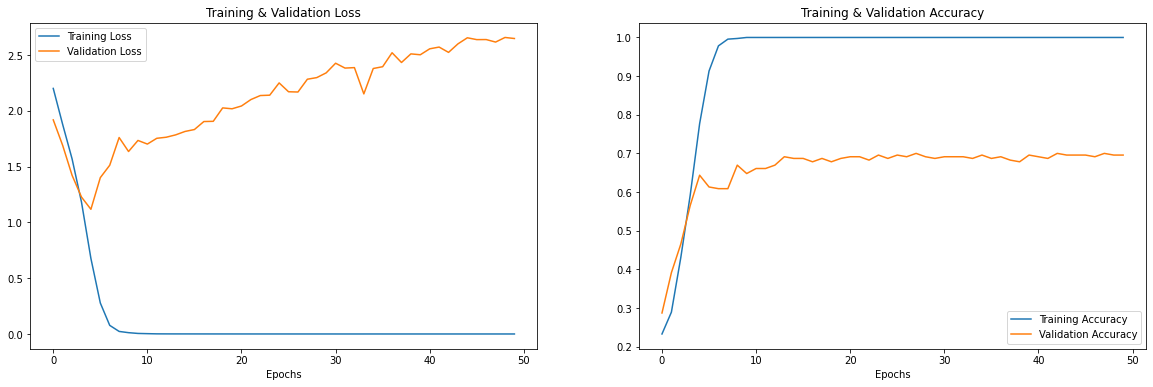

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

2/2 [==============================] - 0s 38ms/step


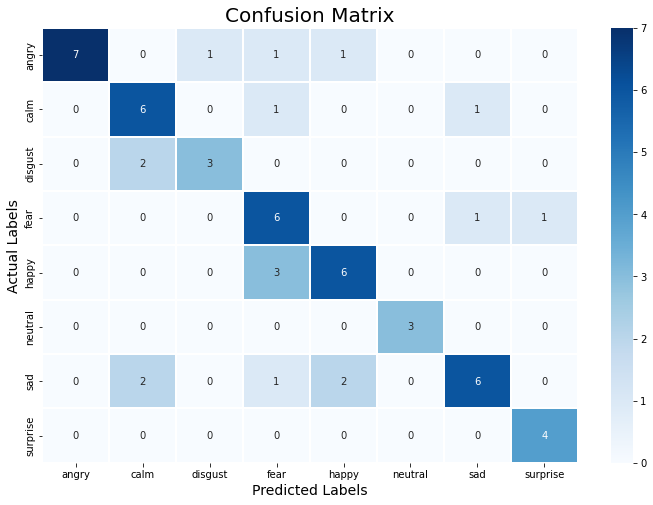

              precision    recall  f1-score   support

       angry       1.00      0.70      0.82        10
        calm       0.60      0.75      0.67         8
     disgust       0.75      0.60      0.67         5
        fear       0.50      0.75      0.60         8
       happy       0.67      0.67      0.67         9
     neutral       1.00      1.00      1.00         3
         sad       0.75      0.55      0.63        11
    surprise       0.80      1.00      0.89         4

    accuracy                           0.71        58
   macro avg       0.76      0.75      0.74        58
weighted avg       0.74      0.71      0.71        58



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))

**categorical loss function**

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.96

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=50,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 2.1579 - accuracy: 0.2431
Epoch 1: val_accuracy improved from -inf to 0.18261, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
18/18 [==============================] - 7s 281ms/step - loss: 2.1579 - accuracy: 0.2431 - val_loss: 1.9107 - val_accuracy: 0.1826
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 1.7086 - accuracy: 0.3299
Epoch 2: val_accuracy improved from 0.18261 to 0.35217, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
18/18 [==============================] - 4s 216ms/step - loss: 1.7086 - accuracy: 0.3299 - val_loss: 1.6106 - val_accuracy: 0.3522
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 1.4016 - accuracy: 0.4688
Epoch 3: val_accuracy improved from 0.35217 to 0.49565, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
18/18 [==========================

In [ ]:
# Evaluation# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

2/2 [==============================] - 0s 40ms/step - loss: 1.5274 - accuracy: 0.7241
Accuracy of our model on test data :  72.41379022598267 %


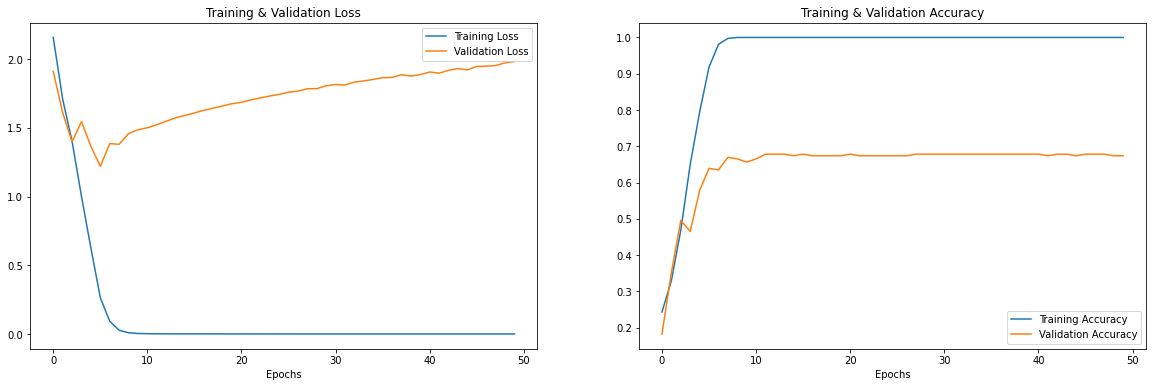

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

2/2 [==============================] - 0s 38ms/step


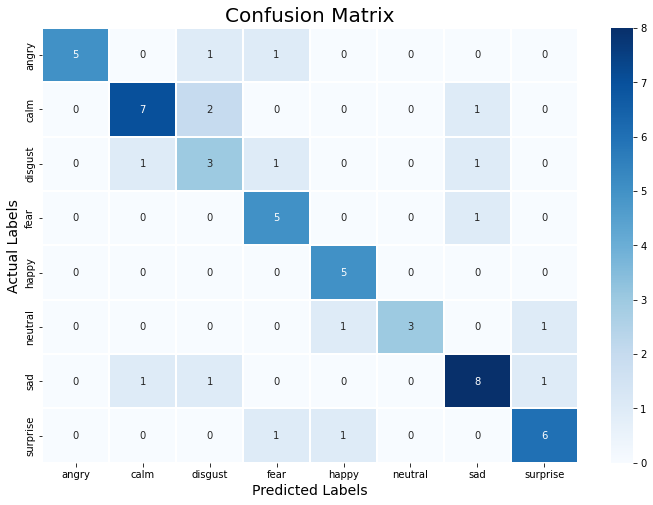

              precision    recall  f1-score   support

       angry       1.00      0.71      0.83         7
        calm       0.78      0.70      0.74        10
     disgust       0.43      0.50      0.46         6
        fear       0.62      0.83      0.71         6
       happy       0.71      1.00      0.83         5
     neutral       1.00      0.60      0.75         5
         sad       0.73      0.73      0.73        11
    surprise       0.75      0.75      0.75         8

    accuracy                           0.72        58
   macro avg       0.75      0.73      0.73        58
weighted avg       0.75      0.72      0.73        58



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))